# Loan Data Exploration
## by: Seni Kamara
## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others (Udacity, DAND, 2019).

In [74]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [75]:
# Read data from file into DF ld
ld_c = pd.read_csv('/Users/senkampro/Documents/DATA_SCIENCE/DAND/PROJECT_5/PROJECT_5.5/prosperLoanData.csv')
ld_c.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [76]:
# First we make copy of the original DF
ld = ld_c.copy()

In [77]:
# Looking at the overall shape of the DF
ld.shape

(113937, 81)

In [78]:
# Looking at the structure of the dataset
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [79]:
# Need to convert DF to Excel for visual assessment
from pandas import ExcelWriter

ld_300 = ld.head(300)

writer = ExcelWriter('LoanData.xlsx')
ld_300.to_excel(writer)
writer.save()

## ASSESS

### Exploratory Analysis of: "Loan Data from Prosper" - `ldp` table

 ###### Data Overview:
 
Loan Data from Prosper:

This data set contains 113,937 loans with 81 variables on each loan.


 


 ###### After doing some programmatic assessment:
 
- dtypes: bool(3), float64(50), int64(11), object(17)
- memory usage: 68.1+ MB
- RangeIndex: 113937 entries, 0 to 113936
- Data columns (total 81 columns)

- This information was very valuable for understanding which variables are "qualitative" and which are "quantitative". That inturn dictates which plot we're going to use for their exploration.



### What is the structure of your dataset?

> Originally the dataset was in csv format. After import into the Jupyter notebook using pandas library, its pandas Data Frame with categorical and numerical variables as columns: int, string, float.

Example:

There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

(worst) ——> (best) 

LoanStatus: Chargedoff, Defaulted, Past Due, Current, Completed 
IncomeRange: Not employed, Not displayed, USD 1-24,999, USD 25,000-49,999, USD 50,000-74,999, USD 75,000-99,999, USD 100,000+ 




### The main features of interest in my dataset are:

> How the borrower's terms affect the loan terms?

> What's the most frequent purpose for a loan?

> What affects the borrower’s APR or interest rate?

> What factors affect a loan’s outcome status?

> Is there a relationship beteween employment, income, property ownership and the loan amount?

> Are there differences between loans depending on how large the original loan amount was?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 ###### After doing some visual assessment:

Decided to group and specify variables that I think will help support my investigation into my feature of interest:

> Loan parameters

- <font color="#007ff">ListingCategory (numeric)</font>
- <font color="#00CC5E">LoanStatus</font> 
- <font color="#007ff">Term</font> 
- <font color="#007ff">LoanOriginalAmount</font>
- <font color="#007ff">BorrowerAPR</font> 
- BorrowerRate
- <font color="#007ff">MonthlyLoanPayment</font>
- LoanOriginationDate
- ClosedDate 

> Borrower’s parameters

- BorrowerState 
- <font color="#00CC5E">Occupation</font> 
- <font color="#00CC5E">EmploymentStatus</font> 
- <font color="#007ff">EmploymentStatusDuration</font> 
- <font color="#00CC5E">IsBorrowerHomeowner</font> 
- <font color="#007ff">CreditScoreRangeUpper</font> 
- <font color="#007ff">CreditScoreRangeLower</font> 

> > Income
- <font color="#007ff">DebtToIncomeRatio</font> 
- <font color="#00CC5E">IncomeRange</font> 
- <font color="#00CC5E">IncomeVerifiable</font> 
- <font color="#007ff">StatedMonthlyIncome</font> 


> Borrower’s relationship with Prosper Loans

- TotalProsperLoans 
- <font color="#007ff">TotalProsperPaymentsBilled</font> 
- OnTimeProsperPayments 
- <font color="#007ff">ProsperPrincipalBorrowed</font> 
- ProsperPrincipalOutstanding 



> Group of variables may be affecting the loan terms


- CurrentDelinquencies
- AmountDelinquent 
- DelinquenciesLast7Years
- EmploymentStatus 
- EmploymentStatusDuration 
- IsBorrowerHomeowner 
- CreditScoreRangeUpper 
- CreditScoreRangeLower
- DebtToIncomeRatio 
- IncomeRange 
- IncomeVerifiable 
- StatedMonthlyIncome
- TotalProsperLoans 
- TotalProsperPaymentsBilled 
- OnTimeProsperPayments


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

###### Starting exploration with `Borrowers parameters`, qualitative variables

##### Define
- Going to use Barcharts to explore qualitative variable: `Occupation`

##### Code


In [80]:
# Checking for the different values in the LoanStatus column
#ld.Occupation.value_counts()

TypeError: 'str' object is not callable

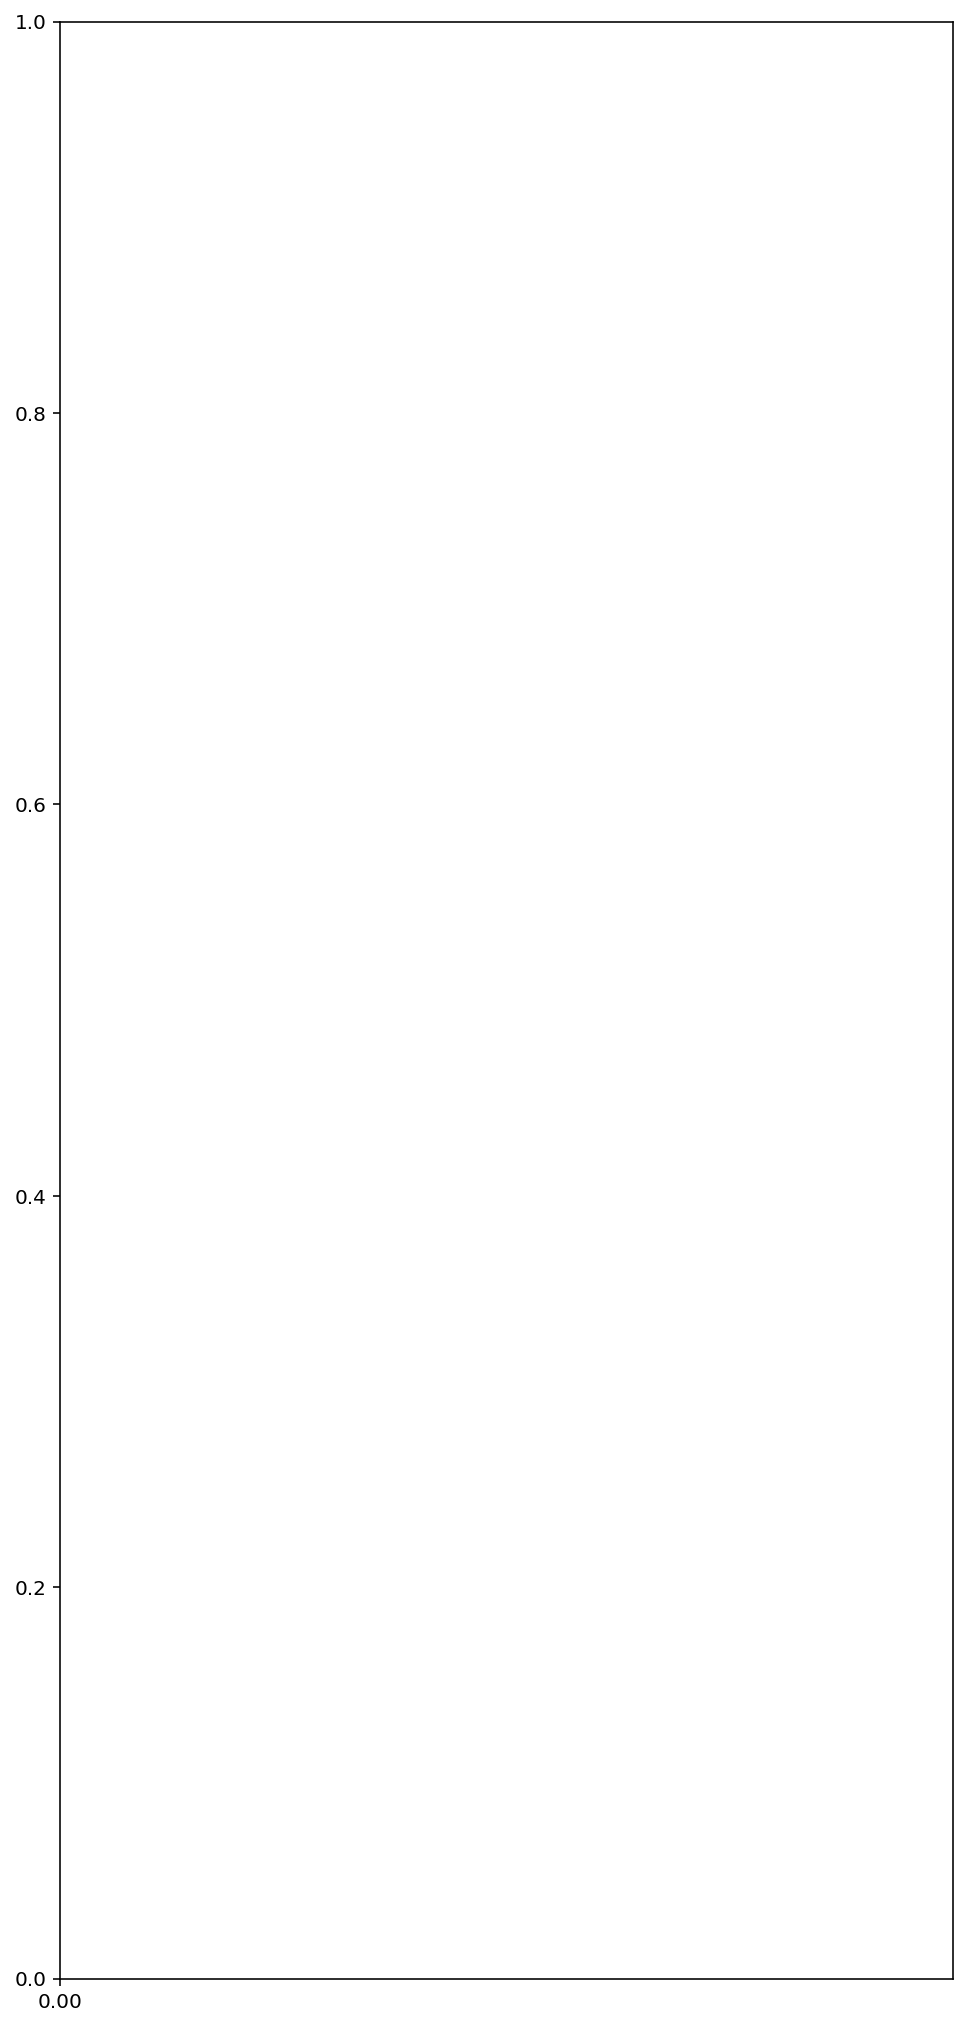

In [81]:
fig = plt.figure(figsize = [8,18])
#ax = fig.add_axes([1, 5, 2, 10])

# Setting color and order
base_color = sb.color_palette()[0]
oc_counts = ld['Occupation'].value_counts()
oc_order = oc_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['Occupation'].value_counts().max()
max_prop = max_count / n_ld

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(oc_counts.shape[0]):
    count = oc_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'Occupation', 
             color = base_color, order = oc_order);




 ######  After doing some exploratory analysis of  `Occupation`:
 - `Other` makes the biggest category with 25.1%
 - The second largest `Ocupation` category is `Professional` with 12%
 - The rest of the occupations follow with a large gap - in 3rd place is `Computer Programmer` with 3.9% 

 
 `Insight`: 
- Most borrowers don't nrespond with the occupation in the list provided.
- A large number of borrowers responded with `Professional` - what do they do for a living?
- The bank doesn't give loans to students

`Question`: What's the true meaning of the value: `Professional`?  Why a quarter of all borrowers indicated `Other` for their occupation, and does it affect loan parameters?

##### Define
- Going to use Bar charts to explore qualitative variables: `IsBorrowerHomeowner`

##### Code


In [ ]:
# Checking for the different values in the IsBorrowerHomeowner column
ld.IsBorrowerHomeowner.value_counts()

 ###### After doing some programmatic assessment of `IsBorrowerHomeowner`:
 - Homeowner and non-homeowners evenly devided between borrowers - 1000 difference.
 
 `Insight`: Lack of homeonwership doesn't decrease chances of getting a loan

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

##### Define
- Going to use Bar charts to explore qualitative variables: `EmploymentStatus`

##### Code


In [ ]:
# Checking for the different values in the LoanStatus column
ld.EmploymentStatus.value_counts()

In [ ]:
ld.EmploymentStatus.isnull().sum()

In [ ]:
# Setting plot size
plt.figure(figsize = [8, 5])

# Setting color and order
base_color = sb.color_palette()[0]
es_counts = ld['EmploymentStatus'].value_counts()
es_order = es_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanStatus'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(es_counts.shape[0]):
    count = es_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'EmploymentStatus', 
             color = base_color, order = es_order);



 ###### After doing some exploratory analysis of  `EmploymentStatus`:
 - 59.1% of all borrowers are `Employed`
 - 23.1% of all borrowers are `Full-time`
 - 5.4% of all borrowers are `Self-employed`
 - 4.7% of all borrowers are `Not-Available`
 - 2255 entries with Null values 
 
 `Insight`: <font color="#007ff">Around 4.7% of borrowers don't have a regular income.</font>
 
 `Question`: <font color="#007ff">Is there a difference in loan terms for these 4.7%? And what is the difference between "Employed" and "Full-time"?</font>
 

##### Define
- Going to use Bar charts to explore qualitative variables: `LoanStatus`

##### Code


In [ ]:
# Checking for the different values in the LoanStatus column
ld.LoanStatus.value_counts()

In [ ]:
ld.LoanStatus.isnull().sum()

In [ ]:
# Setting plot size
plt.figure(figsize = [8, 5])
# Setting color and order
base_color = sb.color_palette()[0]
ls_counts = ld['LoanStatus'].value_counts()
ls_order = ls_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanStatus'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(ls_counts.shape[0]):
    count = ls_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'LoanStatus', 
             color = base_color, order = ls_order);



In [ ]:
# Need to identify all the "Past Due" column LoanStatus

# df = df[df['A'].str.contains('AV', regex=False, case=False, na=False)]
#ld[ld['LoanStatus'].str.contains('Past Due', regex=False, case=False, na=False)]

In [ ]:


# overwriting column with replaced value of age 
#data["Age"]= data["Age"].replace(25.0, "Twenty five") 

# creating a filter for age column 
# where age = "Twenty five" 
#filter = data["Age"]=="Twenty five"

# printing only filtered columns 
#data.where(filter).dropna() 


In [ ]:
# Combining 'Past Due' values and 'FinalPaymentInProgress' with 'Completed'
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (1-15 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (31-60 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (61-90 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (91-120 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (16-30 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (>120 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('FinalPaymentInProgress', 'Completed')

In [ ]:
# Dropping the outliers 'Cancelled'
#df = df[df.line_race != 0]
ld = ld[ld.LoanStatus != 'Cancelled']

In [ ]:
# Checking the code
ld.LoanStatus.value_counts()

In [ ]:
# Setting plot size
plt.figure(figsize = [8, 5])
# Setting color and order
base_color = sb.color_palette()[0]
ls_counts = ld['LoanStatus'].value_counts()
ls_order = ls_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanStatus'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(ls_counts.shape[0]):
    count = ls_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'LoanStatus', 
             color = base_color, order = ls_order);



 ###### After doing some exploratory analysis of `LoanStatus` :
 - Almost 50% of loans are current (paying interest)
 - 33% of all loans are repaid
 - 10.5% are written off (can't be recovered)
 - 4.5% are deliquent
 
 `Insight`: <font color="#007ff">16.7% of all loans are bad business</font>
 
 `Wrangling`: <font color="#007ff">Combined the "Past Due" loans. Combined 'FinalPaymentInProgress' with 'Completed' loans.  Dropped 'Cancelled' loans. Organised into ordered categorical type</font>
 
 `Question`: <font color="#007ff">Are there common characteristics among borrowers or their loan terms, that default?  Are there similarities among borrowers or their loan terms, that repaid?</font>

In [ ]:
# Assess the values of 'IncomeVerifiable' column
ld.IncomeVerifiable.value_counts()

In [ ]:
# Checking for Null entries
ld.IncomeVerifiable.isnull().sum()

 ###### After doing some exploratory analysis of `IncomeVerifiable` :
 - About 8% of all borrowers can't verify their income 
 
 `Insight`: <font color="#007ff">8% of borrowers get loans withouth proving their income</font>
 
 `Question`: <font color="#007ff">Are there common characteristics among borrowers or their loan terms, that can't verify income?</font> 

##### Define
- Going to use Barchart to explore quantitative variable: `ListingCategory (numeric)`. Going to rename the variable to: `LoanPurpose`

##### Code


In [ ]:
# df.rename(columns={"A": "a", "B": "c"})
ld.rename(columns={'ListingCategory (numeric)': 'LoanPurpose'}, inplace = True)

##### Test

In [ ]:
ld.LoanPurpose[3:5]

In [ ]:
ld.LoanPurpose.value_counts()

In [ ]:
fig = plt.figure(figsize = [8,18])
#ax = fig.add_axes([1, 5, 2, 10])

# Setting color and order
base_color = sb.color_palette()[0]
lp_counts = ld['LoanPurpose'].value_counts()
lp_order = lp_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanPurpose'].value_counts().max()
max_prop = max_count / n_ld

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(lp_counts.shape[0]):
    count = lp_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'LoanPurpose', 
             color = base_color);


 ###### After doing some exploratory analysis of `LoanPurpose` :
 - 51.2% of all loans have purpose: 1
 - In the second place with 14.9% of all loans have purpose: 0
 - In the third place with 9.2% purpose: 7
 - Purposes: 2 and 3 are in fourth place with 6.5% and 6.3% respectively
 
 `Insight`: Very big gap between pupose 1 and the other purposes.
 
 `Question`: What is purpose 1 and why there is such a big gap?  

##### Define
- Going to use Barchart to explore qualitative variable: `IncomeRange`

##### Code


In [ ]:
# Exploring values on the 'IncomeRange' variable
ld.IncomeRange.value_counts()

In [ ]:
# Combining "$0" and "Not empoloyed" values
ld['IncomeRange'] = ld['IncomeRange'].replace('$0', 'Not employed')

In [ ]:
ld.IncomeRange.value_counts()

In [ ]:
ld.LoanStatus.value_counts()

In [ ]:
# convert LoanStatus and IncomeRange into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Chargedoff', 'Defaulted', 'Past Due', 'Current', 'Completed'],
                    'IncomeRange': ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999', 
                                    '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    
ld[var] = ld[var].astype(ordered_var)
 

In [ ]:
plt.figure(figsize = [8,5])
#ax = fig.add_axes([1, 5, 2, 10])

# Setting color and order
base_color = sb.color_palette()[0]
ir_counts = ld['IncomeRange'].value_counts()
#ir_order = ir_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['IncomeRange'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(ir_counts.shape[0]):
    count = ir_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'IncomeRange', 
             color = base_color);

 ###### After doing some exploratory analysis of `IncomeRange` :
 - Income ranges: USD 25,000-49,999 and USD 50,000-74,999 make up 28.3% and 27.3% respectively of all loans, and they make up the largest quantities 
 - Income ranges: USD 100,000+ and USD 75,000-99,999 make up 15.2% and 14.8% respectively of all loans.  The second largest quantities.  

 
 `Insight`: <font color="#007ff">Income ranges: USD 100,000+ and USD 75,000-99,999 together make up 30% of all loans.</font> 
 
 `Wrangling`: <font color="#007ff">Convert the income ranges into categorical type. Combined '0' and 'Not employed'</font>
 
 `Question`: <font color="#007ff">Any differences in the loan parameters between the lower ranges and the higher ranges? Any similarities in the loan parameters within the ranges?</font> 


### Now we're going to perform 'Univariate Exploration' on the quantitative variables:


##### Define
- Going to use Histograms to explore quantitative variable: `Term`

##### Code


In [ ]:
# Exploring the values of the 'Term' variable
ld.Term.value_counts()

In [ ]:
ld.Term.isnull().sum()

In [ ]:
labels = '60 months', '36 months', '12 months'
sizes = [24545, 87778, 1614]
colors = ['gold', 'yellowgreen', 'lightcoral']
# explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

 ###### After doing some exploratory analysis of `Term` :
 - 77% of all loans are taken/given for 3 years
 - 21,5% of all loans are taken/given for 5 years
 - Only 1.4% of all loans are taken/given for one year
 
 `Insight`: <font color="#007ff">Lender specializes on commercial loans with 1yr., 3yr. and 5yr terms.</font>
 
 `Question`: <font color="#007ff">Any differences between 3yr. and 5yr loans? Any similarities within 3yr and 5yr loans?</font>

##### Define
- Going to use Histograms to explore quantitative variable: `LoanOriginalAmount`

##### Code


In [ ]:
ld.LoanOriginalAmount.isnull().sum()

In [ ]:
# Plotting LoanOriginalAmount

bins = np.arange(0, ld['LoanOriginalAmount'].max()+1000, 1500)

plt.hist(data = ld, x = "LoanOriginalAmount", bins = bins);

In [ ]:
sb.distplot(ld['LoanOriginalAmount']);

In [ ]:
# Organizing the bins for better visualisation
bin_edges = np.arange(2500, 35000+5000, 5000)
plt.hist(ld['LoanOriginalAmount'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(5000, 35000+2500, 5000))
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of Loans');

 ###### After doing some exploratory analysis of  `LoanOriginalAmount` :
 - The graph shows that most of the loans are up to USD 5000
 - Graph also shows that most of the loans are taken/given in USD 5000 increments: USD 5K, USD 10000, USD 15000, USD 20000, USD 25000, USD 30000 and USD 35000
 
  `Insight`: <font color="#007ff">Lender specializes on commercial loans with, loan values (LV): USD 5K, USD 10K, USD 20K, USD 25K, USD 30K, and USD 35K</font>
 
 `Question`: <font color="#007ff">Is there a difference or similarities in borrowers and loan terms according to LV?</font>  

##### Define
- Going to use Histograms to explore quantitative variable: `BorrowerAPR`

##### Code


In [ ]:
ld.BorrowerAPR.isnull().sum()

In [ ]:
# Dropping the null values
# df.dropna(subset=['name', 'born'])
ld.dropna(subset=['BorrowerAPR'], inplace=True)

In [ ]:
ld.BorrowerAPR.isnull().sum()

In [ ]:
# Plotting histogram with variable 'BorrowerAPR'
# Organizing the bins for better visualisation
bin_edges = np.arange(0.05, 0.4+0.1, 0.1)
plt.hist(ld['BorrowerAPR'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0.1, 0.4+0.05, 0.1))
plt.xlabel('Borrower APR')
plt.ylabel('Number of Loans');

 ###### After doing some exploratory analysis of `BorrowerAPR` :
 - The plot shows that most loans are taken/given around 0.2% rate.
 - Loans with 0.1% and with ) 0.3% APR are in second place
 - The least quantity of loans in the portfolio have 0.4% APR.
 
  `Insight`: <font color="#007ff">Quantity of loans with 0.4% is considerably small compared to the other rates.</font>
  
  `Wrangling`: <font color="#007ff">Dropped null values.</font>
 
 `Question`: <font color="#007ff">Why is there such a big gap between the loans with 0.4% APR and the other rates, considering that 0.1% difference between rates is not that significant?</font>

##### Define
- Going to use Histograms to explore quantitative variable: `MonthlyLoanPayment`

##### Code


In [ ]:
ld.MonthlyLoanPayment.isnull().sum()

In [ ]:
# Plotting histogram with variable 'MonthlyLoanPayment'
plt.hist(data = ld, x = 'MonthlyLoanPayment');

In [ ]:
# Organizing the bins for better visualisation
plt.figure(figsize = [10, 5])
bin_edges = np.arange(50, 1250+100, 100)
plt.xticks(np.arange(100, 1250+100, 100))
plt.xlabel = 'Monthly payments (in USD)'
plt.ylabel = 'Number of Loans'
plt.hist(ld['MonthlyLoanPayment'] , bins = bin_edges, rwidth = 0.7);

In [ ]:
# Converting the xscale and ticks for better readability 
bin_edges = 10 ** np.arange(0.8, np.log10(ld.MonthlyLoanPayment.max())+0.1, 0.05)
plt.hist(ld.MonthlyLoanPayment, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 500, 1000, 3000]
plt.xticks(tick_locs, tick_locs);

 ###### After doing some exploratory analysis of `MonthlyLoanPayment` :
 - The plot shows bimodal distribution with picks at USD 160 and USD 400 monthly payments.
 
  `Insight`: <font color="#007ff">A very large amount of loans is generating over USD 400 monthly payments.</font> 
  
  `Exploration`: <font color="#007ff">looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak at USD 160 and, and another at USD 400.</font> 
 
 `Question`: <font color="#007ff">Do smaller payments and therefore smaller loans have less delinquent Loan Statuses?</font> 

##### Define
- Going to use Histograms to explore quantitative variable: `EmploymentStatusDuration`

##### Code


In [ ]:
ld.EmploymentStatusDuration.isnull().sum()

In [ ]:
ld_em =ld.dropna(subset=['EmploymentStatusDuration'])

In [ ]:
ld_em.EmploymentStatusDuration.isnull().sum()

In [ ]:
# Plotting histogram with variable 'EmploymentStatusDuration'
plt.hist(data = ld, x = 'EmploymentStatusDuration');

The plot is scewed to the right with a long tail, so we're going to use log scale to make sense of the outliers.

In [ ]:
np.log10(ld['EmploymentStatusDuration'].describe())

In [ ]:
# Plotting the variable on the log scale
plt.figure(figsize = [8, 5])
bin_edges = 10 ** np.arange(-1, 5+0.1, 0.1)
plt.hist(data = ld, x = 'EmploymentStatusDuration' , bins = bin_edges)
plt.xscale('log');

Obvious outliers on the left side of the distribution

In [ ]:
# Converting the xscale and ticks for better readability 
plt.figure(figsize = [8, 5])
bin_edges = 10 ** np.arange(0.8, np.log10(ld.EmploymentStatusDuration.max())+0.1, 0.1)
plt.hist(ld.EmploymentStatusDuration, bins = bin_edges)
plt.xscale('log')

#It is important that the xticks are specified after xscale since that 
#function has its own built-in tick settings.
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);

In [ ]:
# Select low outliers
low_outliers = (ld_em['EmploymentStatusDuration'] < 12)
print(low_outliers.sum())


 ###### After doing some exploratory analysis of `EmploymentStatusDuration` :
 - The plot shows that most borrowers have: 50 to 200 months or 4 to 16 years of employment history.
 
  `Insight`: <font color="#007ff">Most of the borrowers have a solid employment history. 13721 loans are given to borrowers with less than 12 months employment history.</font>  
 
 `Question`: <font color="#007ff">What are the loan terms for the outliers, especially for those with less than 12 months of employment history?</font>

##### Define
- Going to use Histograms to explore quantitative variable: `DebtToIncomeRatio`

##### Code


In [ ]:
ld.DebtToIncomeRatio.isnull().sum()

In [ ]:
ld_em.DebtToIncomeRatio.isnull().sum()

In [ ]:
ld_em_di =ld.dropna(subset=['DebtToIncomeRatio'])

In [ ]:
ld_em_di.DebtToIncomeRatio.isnull().sum()

In [ ]:
ld_em_di['DebtToIncomeRatio'].describe()

Very unusual value: max = 10; How can a ratio of Debt to Income be 10, that means the debt burden is 10 times higher than income.  How is that possible?

In [ ]:
# Plotting histogram with variable 'BorrowerAPR'
plt.hist(data = ld, x = 'DebtToIncomeRatio')
plt.xlim(0, 3);

In [ ]:
# Organizing the bins for better visualisation
plt.figure(figsize = [10, 5])
bin_edges = np.arange(0.05, 1+0.15, 0.1)
plt.hist(ld_em_di['DebtToIncomeRatio'] , bins = bin_edges, rwidth = 0.6)
plt.xticks(np.arange(0.1, 1+0.15, 0.1));

In [ ]:
# Converting the xscale and ticks for better readability 
bin_edges = 10 ** np.arange(0.01, np.log10(ld.DebtToIncomeRatio.max())+0.1, 0.1)
plt.hist(ld_em_di.DebtToIncomeRatio, bins = bin_edges)
plt.xscale('log')

#It is important that the xticks are specified after xscale since that 
#function has its own built-in tick settings.
tick_locs = [0.5, 1, 2, 5, 10, 15, 20]
plt.xticks(tick_locs, tick_locs);

In [ ]:
# Select high outliers
high_outliers = (ld_em_di['DebtToIncomeRatio'] > 0.8)
print(high_outliers.sum())

That is high risk zone for the bank

In [ ]:
# Select high outliers
high_outliers = (ld_em_di['DebtToIncomeRatio'] > 1)
print(high_outliers.sum())

This is an area of special attention.  Debt Income ratio more than "1" means that the borrower has more debts than income, and that is problematic situation!

 ###### After doing some exploratory analysis of `DebtToIncomeRatio` :
 - The plot shows that most loans have Debt to Income ratio between 0.1 and 0.2.
 
  `Insight`: <font color="#007ff">Very unusual outliers showing a large number of loans with a very high Income to Debt ratio 1208 loans > 0.8 DI ratio, but 799 loans > 1 DI ratio</font>  
  
  `Wrangling`: <font color="#007ff">Dropped 8424 null values.</font> 
  
  `Exploring`: <font color="#007ff">Did log scale transformation to identify outliers</font>
 
 `Question`: <font color="#007ff">What are the loan terms for outliers with 0.8 Debt to Income ratio?</font>

##### Define
- Going to use Histograms to explore quantitative variable: `StatedMonthlyIncome`

##### Code


In [ ]:
# Exploring values of 'StatedMonthlyIncome'
ld.StatedMonthlyIncome

In [ ]:
ld.StatedMonthlyIncome.describe()

In [ ]:
# Converting floats to int
# df.col = df.col.astype(int)
ld.StatedMonthlyIncome = ld.StatedMonthlyIncome.astype(int)

In [ ]:
# Testing
ld.StatedMonthlyIncome.dtype

In [ ]:
# plotting carat on a standard scale
binsize = 1000
bins = np.arange(0, ld['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ld, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim([0,40000])
plt.show()

Right skewed plot with a long tail.  

In [ ]:
# Converting the xscale and ticks for better readability 
plt.figure(figsize=[10, 7])
bin_edges = 10 ** np.arange(0.8, np.log10(ld.StatedMonthlyIncome.max())+0.1, 0.1)
plt.hist(ld.StatedMonthlyIncome, bins = bin_edges)
plt.xscale('log')

#It is important that the xticks are specified after xscale since that 
#function has its own built-in tick settings.
tick_locs = [100, 500, 2000, 5000, 20000]
plt.xticks(tick_locs, tick_locs);

 ###### After doing some exploratory analysis of `StatedMonthlyIncome` :
 - The plot shows normal distribution with the mean income at 5000
 
  `Insight`: USD 5000 monthly income for the majority of borrowers corresponds with the findings in the IncomeRange column where the mean annual income falls in the range of USD 25000 - USD 75000.

### Qualitative variables

 ###### After doing some exploratory analysis of  `EmploymentStatus`:
 - 59.1% of all borrowers are `Employed`
 - 23.1% of all borrowers are `Full-time`
 - 5.4% of all borrowers are `Self-employed`
 - 4.7% of all borrowers are `Not-Available`
 - 2255 entries with Null values
 
 
 `Insight`: <font color="#007ff">4.7%% of borrowers don't have a regular income.</font>
 
 `Question`: <font color="#007ff">Is there a difference in loan terms for these 11%? And what is the difference between "Employed" and "Full-time"?</font>
 

 ###### After doing some exploratory analysis of `IncomeVerifiable` :
 - About 8% of all borrowers can't verify their income 
 
 `Insight`: <font color="#007ff">8% of borrowers get loans withouth proving their income</font>
 
 `Question`: <font color="#007ff">Are there common characteristics among borrowers or their loan terms, that can't verify income?</font> 

 ###### After doing some exploratory analysis of `LoanStatus` :
 - Almost 50% of loans are current (paying interest)
 - 33% of all loans are repaid
 - 10.5% are written off (can't be recovered)
 - 4.5% are deliquent
 
 `Insight`: <font color="#007ff">16.7% of all loans are bad business</font>
 
 `Wrangling`: <font color="#007ff">Combined the "Past Due" loans. Combined 'FinalPaymentInProgress' with 'Completed' loans.  Dropped 'Cancelled' loans. Organised into ordered categorical type</font>
 
 `Question`: <font color="#007ff">Are there common characteristics among borrowers or their loan terms, that default?  Are there similarities among borrowers or their loan terms, that repaid?</font>

 ###### After doing some exploratory analysis of `IncomeRange` :
 - Income ranges: USD 25,000-49,999 and USD 50,000-74,999 make up 28.3% and 27.3% respectively of all loans, and they make up the largest quantities 
 - Income ranges: USD 100,000+ and USD 75,000-99,999 make up 15.2% and 14.8% respectively of all loans.  The second largest quantities.  

 
 `Insight`: <font color="#007ff">Income ranges: USD 100,000+ and USD 75,000-99,999 together make up 30% of all loans.</font> 
 
  `Wrangling`: <font color="#007ff">Convert the income ranges into categorical type. Combined '0' and 'Not employed'</font>
 
 `Question`: <font color="#007ff">Any differences in the loan parameters between the lower ranges and the higher ranges? Any similarities in the loan parameters within the ranges?</font> 

### Quantitative variables

 ###### After doing some exploratory analysis of `Term` :
 - 77% of all loans are taken/given for 3 years
 - 21,5% of all loans are taken/given for 5 years
 - Only 1.4% of all loans are taken/given for one year
 
 `Insight`: <font color="#007ff">Lender specializes on commercial loans with 1yr., 3yr. and 5yr terms.</font>
 
 `Question`: <font color="#007ff">Any differences between 3yr. and 5yr loans? Any similarities within 3yr and 5yr loans?</font>

 ###### After doing some exploratory analysis of  `LoanOriginalAmount` :
 - The graph shows that most of the loans are up to USD 5000
 - Graph also shows that most of the loans are taken/given in USD 5000 increments: USD 5K, USD 10000, USD 15000, USD 20000, USD 25000, USD 30000 and USD 35000
 
  `Insight`: <font color="#007ff">Lender specializes on commercial loans with, loan values (LV): USD 5K, USD 10K, USD 20K, USD 25K, USD 30K, and USD 35K</font>
 
 `Question`: <font color="#007ff">Is there a difference or similarities in borrowers and loan terms according to LV?</font>  

 ###### After doing some exploratory analysis of `BorrowerAPR` :
 - The plot shows that most loans are taken/given around 0.2% rate.
 - Loans with 0.1% and with ) 0.3% APR are in second place
 - The least quantity of loans in the portfolio have 0.4% APR.
 
  `Insight`: <font color="#007ff">Quantity of loans with 0.4% is considerably small compared to the other rates.</font>
  
  `Wrangling`: <font color="#007ff">Dropped null values.</font>
 
 `Question`: <font color="#007ff">Why is there such a big gap between the loans with 0.4% APR and the other rates, considering that 0.1% difference between rates is not that significant?</font>

 ###### After doing some exploratory analysis of `EmploymentStatusDuration` :
 - The plot shows that most borrowers have: 50 to 200 months or 4 to 16 years of employment history.
 
  `Insight`: <font color="#007ff">Most of the borrowers have a solid employment history. 13721 loans are given to borrowers with less than 12 months employment history.</font>  
 
 `Question`: <font color="#007ff">What are the loan terms for the outliers, especially for those with less than 12 months of employment history?</font>

 ###### After doing some exploratory analysis of `MonthlyLoanPayment`:
 - The plot shows bimodal distribution with picks at USD 160 and USD 400 monthly payments.
 
  `Insight`: <font color="#007ff">A very large amount of loans is generating over USD 400 mothly payments.</font>   
 
 `Question`: <font color="#007ff">Do smaller payments and therefore smaller loans have less delinquent Loan Statuses?</font>

 ###### After doing some exploratory analysis of `DebtToIncomeRatio` :
 - The plot shows that most loans have Debt to Income ratio between 0.1 and 0.2.
 
  `Insight`: <font color="#007ff">Very unusual outlier showing a large number of loans with a very high Income to Debt ratio - close to 1</font>  
  
  `Wrangling`: <font color="#007ff">Dropped 8424 null values.</font> 
  
  `Exploring`: <font color="#007ff">Did log scale transformation to identify outliers. 1205 loans have 0.8 ratio or higher</font>
 
 `Question`: <font color="#007ff">What are the loan terms for outliers with 0.8 Debt to Income ratio?</font>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> `MonthlyLoanPayment` variable: When used a regular plot, there was a long tail with outliers. For further exploration log scale was applied.

> `EmploymentStatusDuration` variable: Regular plot revealed right scew with outliers. Log scale was applied to examine the outliers closer.

> `DebtToIncomeRatio` variable: Dropped 8424 null values. Regular plot made no sense. Had to applied log scale to examine the distribution.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> `LoanStatus` variable: removed the "bucket" for all "Past Due" loans.  This way we have 3 delinquent values: Chargedoff, Defaulted, Past Due. Combined 'FinalPaymentInProgress' with 'Completed' loans.  Dropped 'Cancelled' loans. Converted into ordered categorical type.

> `IncomeRange` variable: Converted the income ranges into categorical type. Combined '0' and 'Not employed' values.

> `BorrowerAPR` variable: Dropped null values.

> `MonthlyLoanPayment` variable: Looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak at USD 160 and, and another at USD 400.

> `EmploymentStatusDuration` variable: Log scale revealed outliers to the left of the mean and programatic analysis proved that there 13721 loans with less than 12 months employment history. 

> `DebtToIncomeRatio` variable: Log scale transformation clearly showed outliers at the upper end of the ratios. 1205 loans have 0.8 ratio or higher.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

`Categorical`:

- EmploymentStatus = ES
- IncomeVerifiable = IV
- LoanStatus = LS
- IncomeRange = IR


`Numeric`: 

- LoanOriginalAmount = LA
- BorrowerAPR = APR
- EmploymentStatusDuration = EMP
- MonthlyLoanPayment = MP
- DebtToIncomeRatio = DI



In [84]:
ld_em_di.IncomeRange.value_counts()

$25,000-49,999    29880
$50,000-74,999    29360
$100,000+         16071
$75,000-99,999    16015
Not displayed      7588
$1-24,999          6361
Not employed         78
Name: IncomeRange, dtype: int64

In [85]:
# Assign ld_em_di DF to a new "Univariate Explored" DF - ld_u for further explorations
ld_u = ld_em_di

In [86]:
ld_u.IncomeRange.value_counts()

$25,000-49,999    29880
$50,000-74,999    29360
$100,000+         16071
$75,000-99,999    16015
Not displayed      7588
$1-24,999          6361
Not employed         78
Name: IncomeRange, dtype: int64

In [89]:
# Setting up the numeric variables
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'EmploymentStatusDuration', 'MonthlyLoanPayment', 'DebtToIncomeRatio']



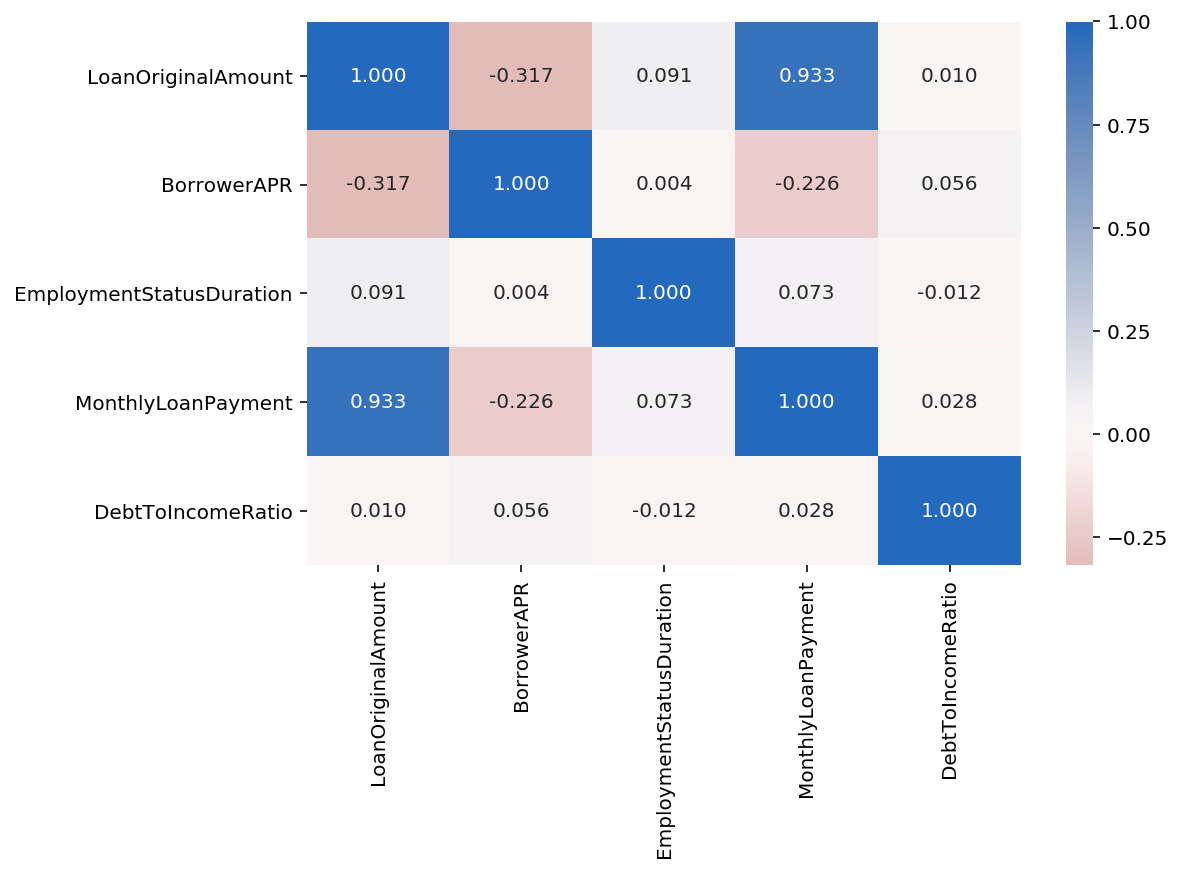

In [90]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(ld_em_di[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


Intersting points: 

1. x = APR;
   y = LA


2. x = EMP;
   y = LA
 
 
3. x = APR;
   y = MP
   
Negative correlation between APR and MP, because of negative correlation b/w APR and LA. Small LA has a bigger APR (b/c risk), and because of the LA size, the MP is small. The opposite is true!

Positive correlation b/w EMP and LA (0.09) meaning higher EMP lead to hiher IR and in turn higher LA `normal insight`

However a slight positive correlation b/w EMP and APR (0.004) is very surprising.  Why would a higher EMP will lead to increase in APR? - `very interesting insight`. 

The strong negative relationship b/w APR and LA (-0.3) doesn't translate into as strong negative relationship between EMP and APR (0.004), on the contrary, higher EMP should yeild lower APR. 

Very strange that, there's a mild positive correlation b/w EMP and LA (0.09), Even though higher EMP should yeild bigger LA, unless when higher EMP doesn't mean higher IR (Income Range), and that's a very `intersting insight`.

Negative correlation b/w APR and MP (-0.23). Lower APR means bigger LA, bigger LA means bigger MP - that's why there's a negative relationship b/w APR and MP.

What influences APR?

4. x = DI;
   y = APR



Very interesting relationship b/w EMP and DI (-0.01)


5. x = EMP;
   y = DI
   
   


/Users/senkampro/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


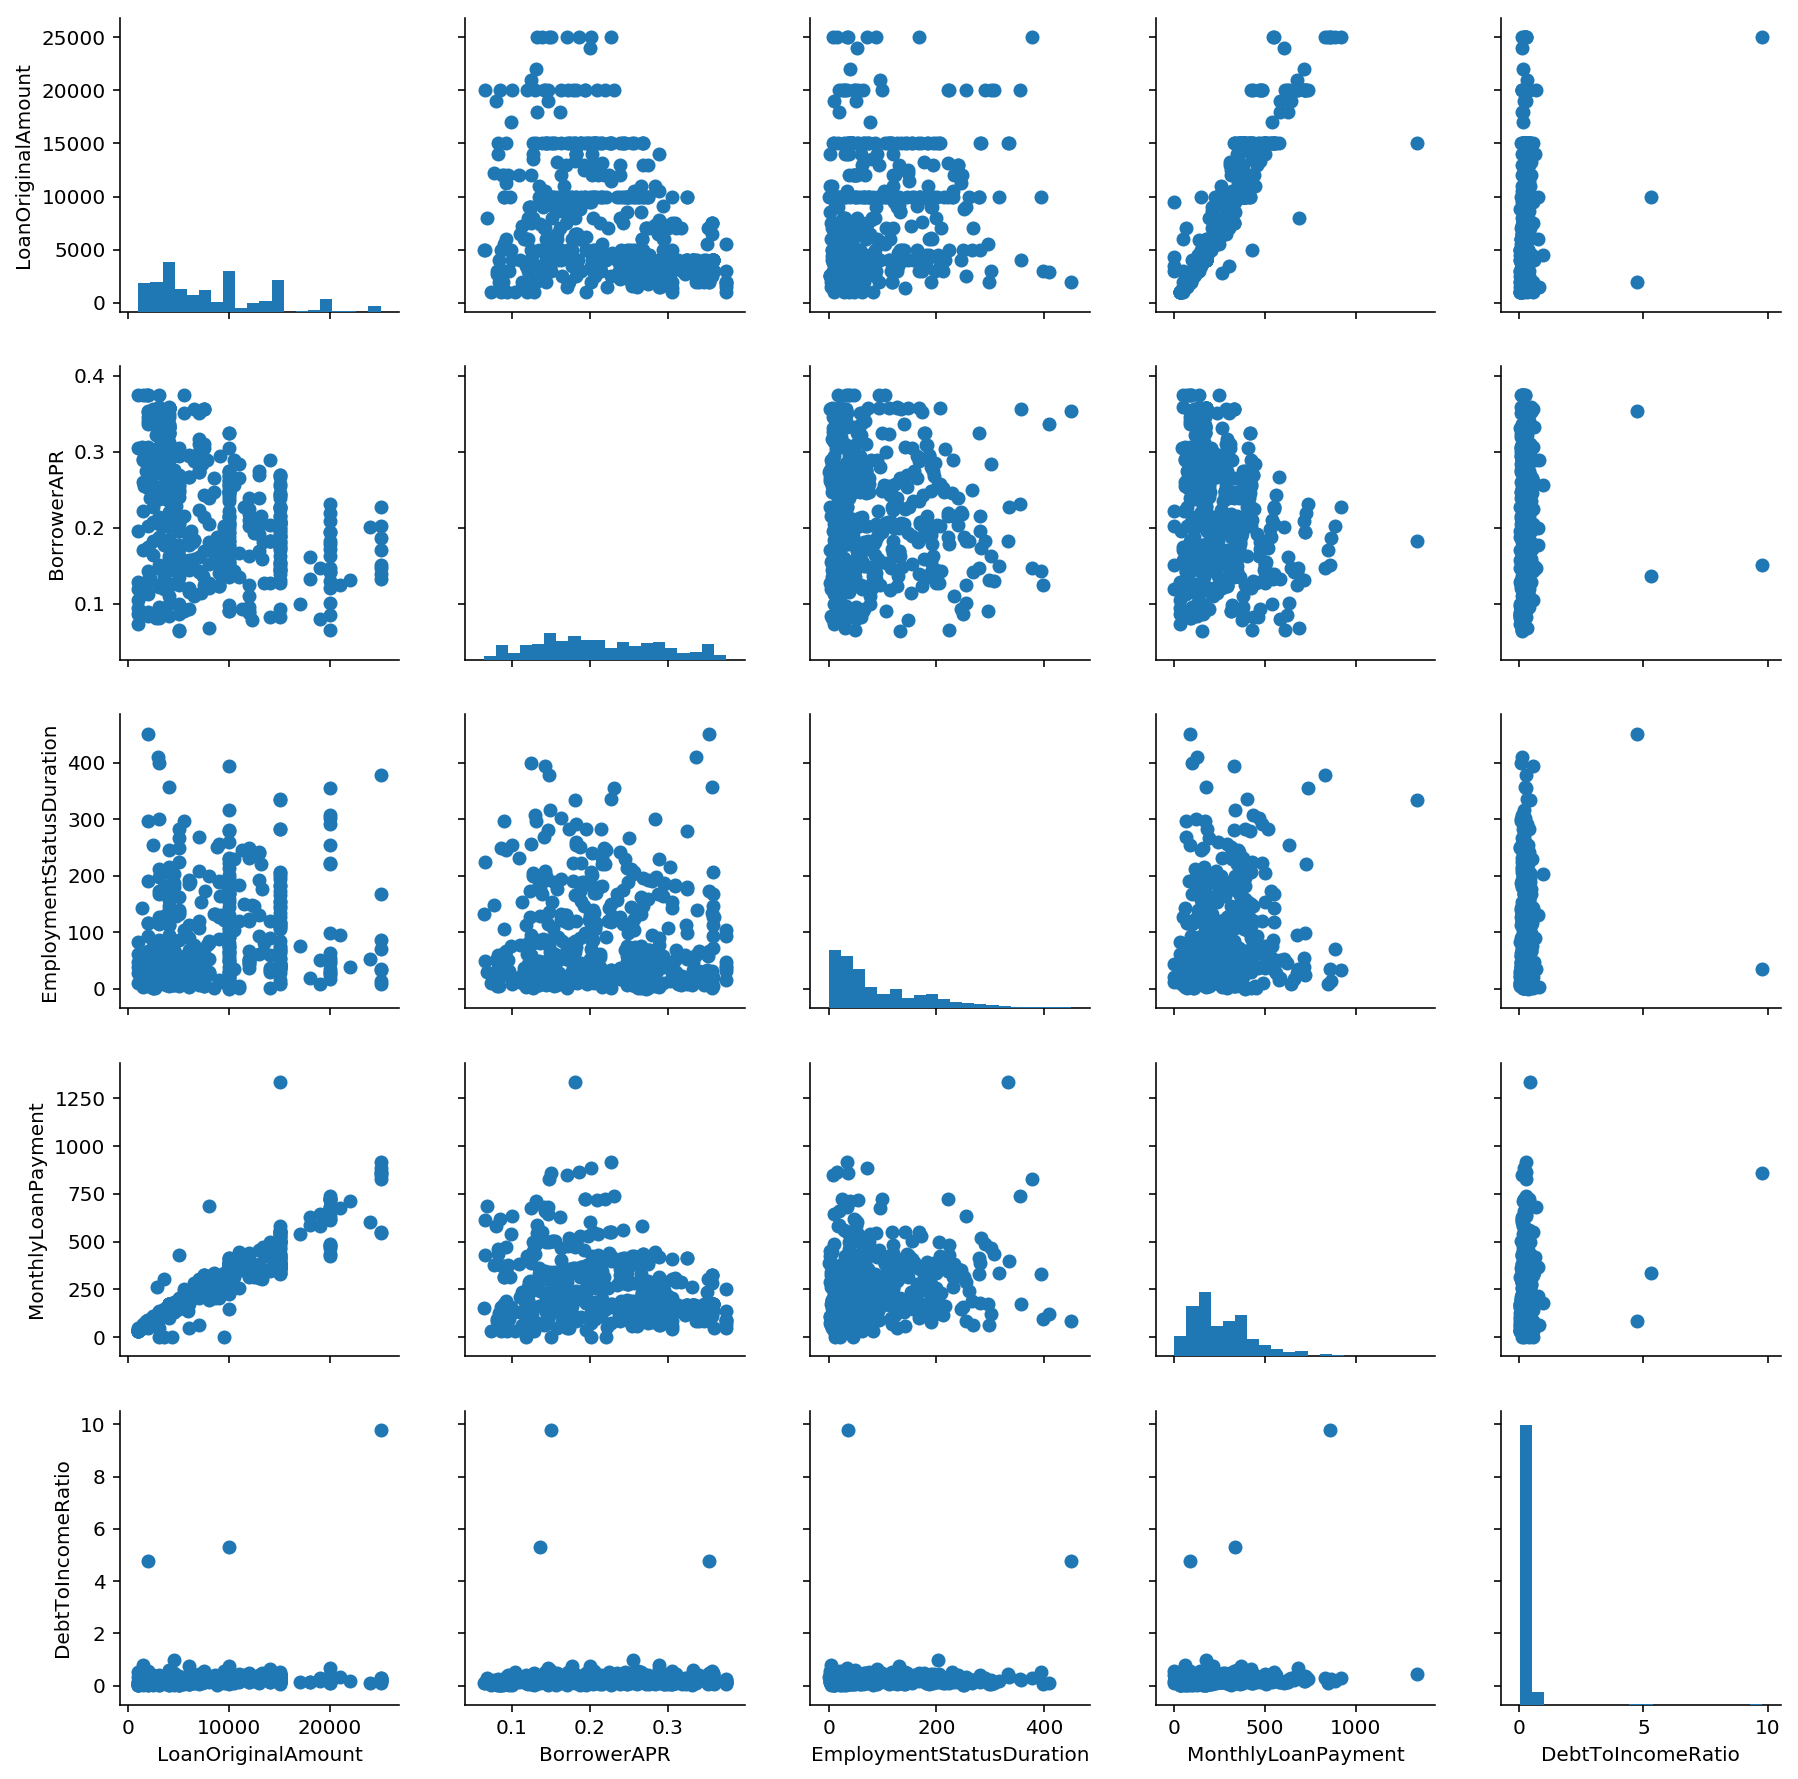

In [91]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(ld_u.shape[0], 500, replace = False)
loans_samp = ld_u.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

We see an obvious correlation b/w LA and MP, the bigger the loan, the bigger the monthly payment.  Other variables don't show noticeable correlation between variables. 

We can also see that there is no strength in the relatioships we raised earlier. Meaning that the levels of negative and positive correlation b/w the variables displayed in the previous heatmap are not significant.

For example:

> However a slight positive correlation b/w EMP and APR (0.004) is very surprising. Why would a higher EMP will lead to increase in APR? - very interesting insight.

To dig a bit deeper, we'll use individual scatterplot for both variables.

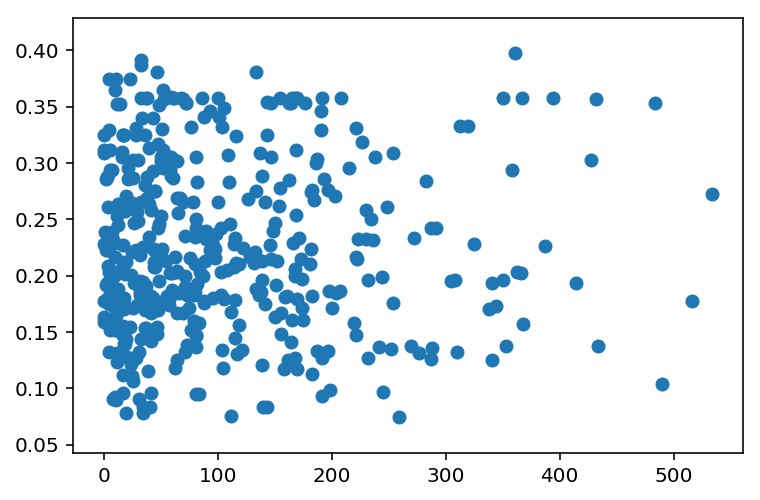

In [92]:
# plot scatter plot: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(ld_u.shape[0], 500, replace = False)
loans_samp = ld_u.loc[samples,:]

# Scatter plot for EMP and LA
# plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.scatter(data = loans_samp, x = 'EmploymentStatusDuration', y = 'BorrowerAPR');
# plt.xlabel('EmploymentStatusDuration')
# plt.ylabel('BorrowerAPR');

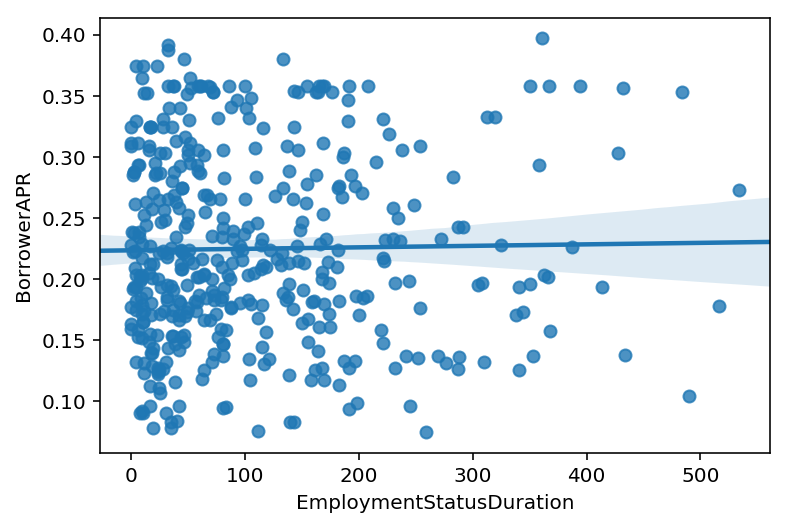

In [93]:
# Using seaborn reg.plot with regression line
# sb.reg plot(data = df, x = 'num_var1', y = 'num_var2')
sb.regplot(data = loans_samp, x = 'EmploymentStatusDuration', y = 'BorrowerAPR');

No obvious relationship can be seen

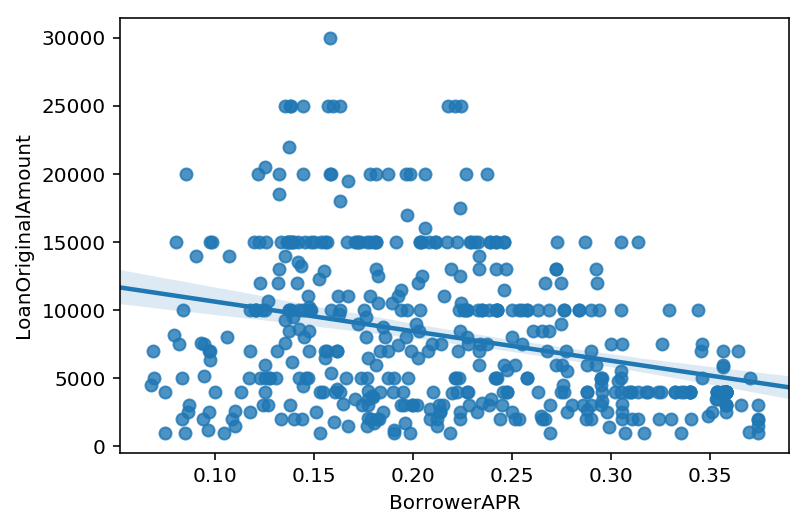

In [94]:
# Checking supposed negative relationship b/w APR and LA (-0.3)

# Sample 500 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0], 500, replace = False)
loans_samp = ld_u.loc[samples,:]

sb.regplot(data = loans_samp, x = 'BorrowerAPR', y = 'LoanOriginalAmount');

Here the negative correlation b/w the APR and the LA is presented by the regression line. The slope is not that steep and the points around it don't align to strengthen the support for this relationship.

However, another `insight` is coming to light.  There seems to be a fixed relationship, where a paticular LA (10K, 15K, 20K...) is given out at different APRs.

Let's increase the sample.

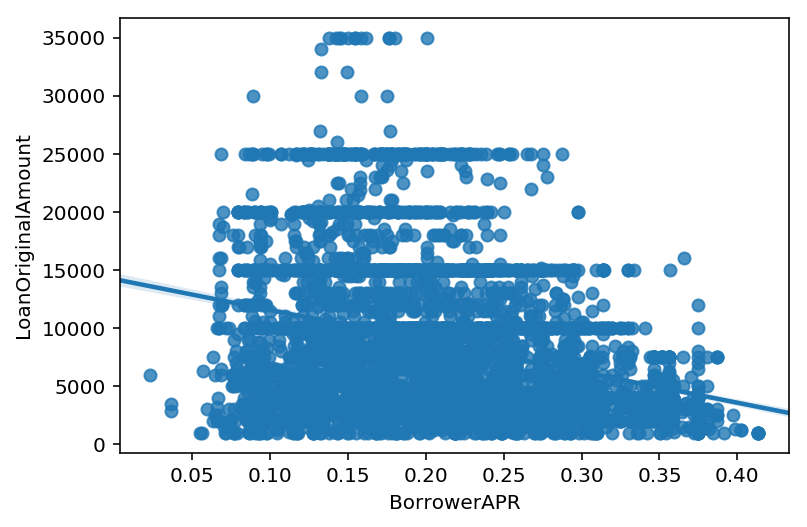

In [95]:
# Checking supposed negative relationship b/w APR and LA (-0.3)

# Sample 500 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0], 5000, replace = False)
loans_samp = ld_u.loc[samples,:]

sb.regplot(data = loans_samp, x = 'BorrowerAPR', y = 'LoanOriginalAmount');

Yes, we clearly see that LA = USD 25K has been approved at APR range of 0.07 to 0.34, and even though it is a pretty wide range, (considering the the full APR range examined is: 0.01 to 0.44) the ranges of APR get smaller as the LA increses and that is what is supporting the slight negative correlation b/w APR and LA.  

The insight that smaller APR go with larger LAs.

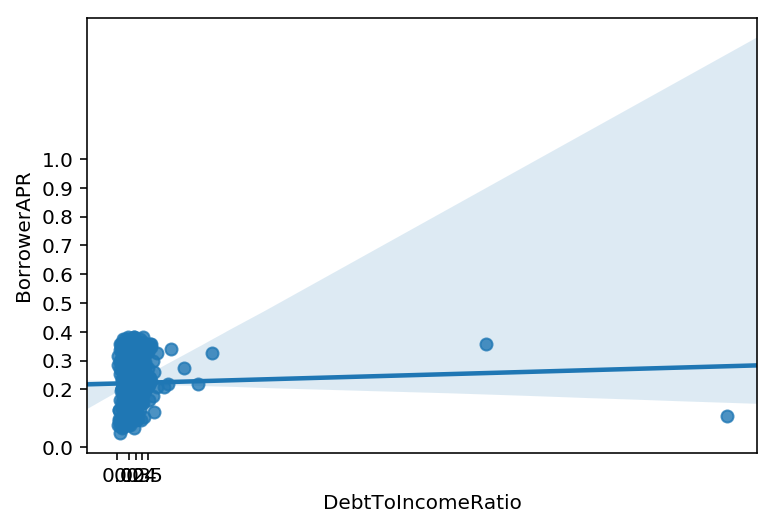

In [98]:
# Checking supposed negative relationship b/w APR and LA (-0.3)

# Sample 500 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0], 500, replace = False)
loans_samp = ld_u.loc[samples,:]
plt.xticks([0, 0.2, 0.3, 0.4, 0.5])
plt.yticks([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
sb.regplot(data = loans_samp, x = 'DebtToIncomeRatio', y = 'BorrowerAPR');

Obvious outliers that were picked up during univariate exploration. Going to take care of them now.

In [99]:
ld_di = ld_u[ld_u['DebtToIncomeRatio'] < 1]

In [100]:
ld_di[ld_di['DebtToIncomeRatio'] > 1]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


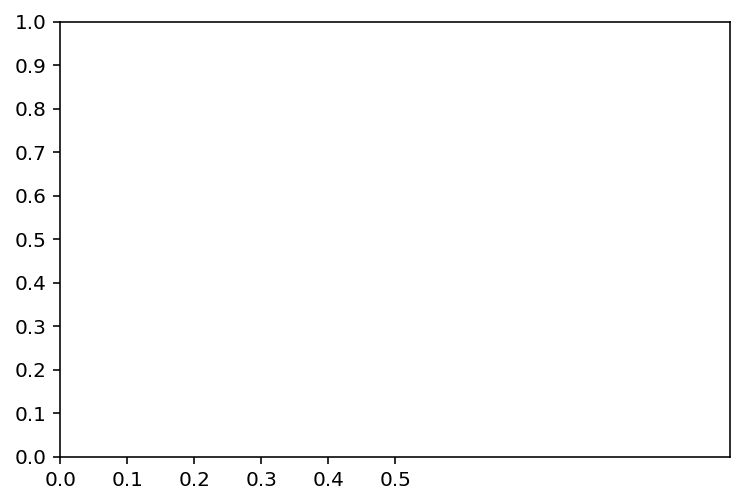

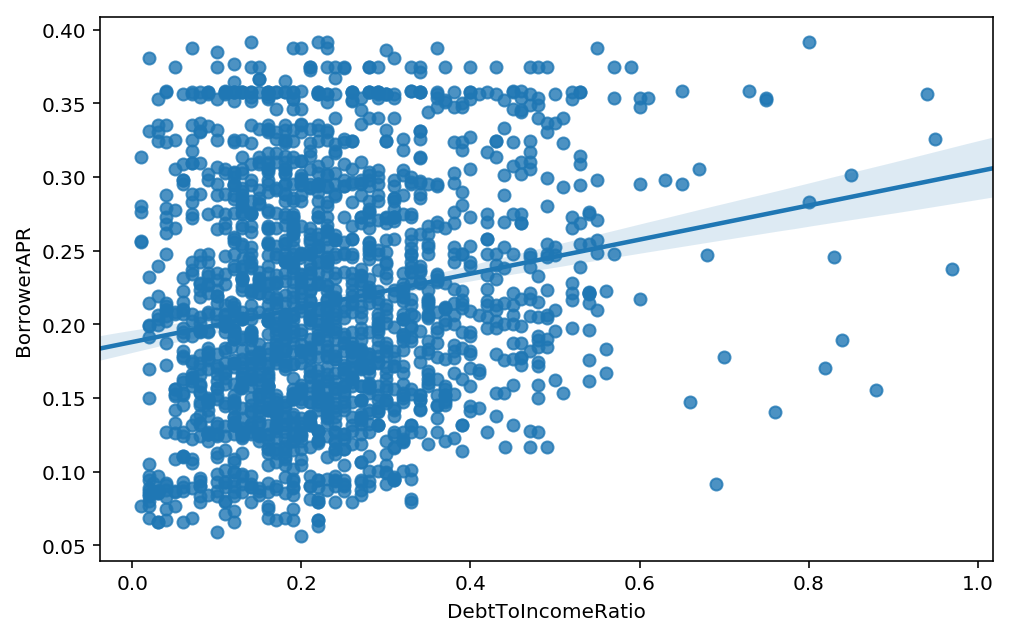

In [101]:
# Sample 500 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_di.shape[0], 2000, replace = False)
loans_samp = ld_di.loc[samples,:]
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.figure(figsize = [8, 5])
sb.regplot(data = loans_samp, x = 'DebtToIncomeRatio', y = 'BorrowerAPR');

There is a slight positive correlation b/w DI and APR, not sure how significant is this level of correlation for our purposes.

However, we see a line pattern at APR 0.36. This means that this rate is given to borrowers with low DIs and to the ones with higher DIs.


Will try to explore relatioship between EMP and LA (0.09)

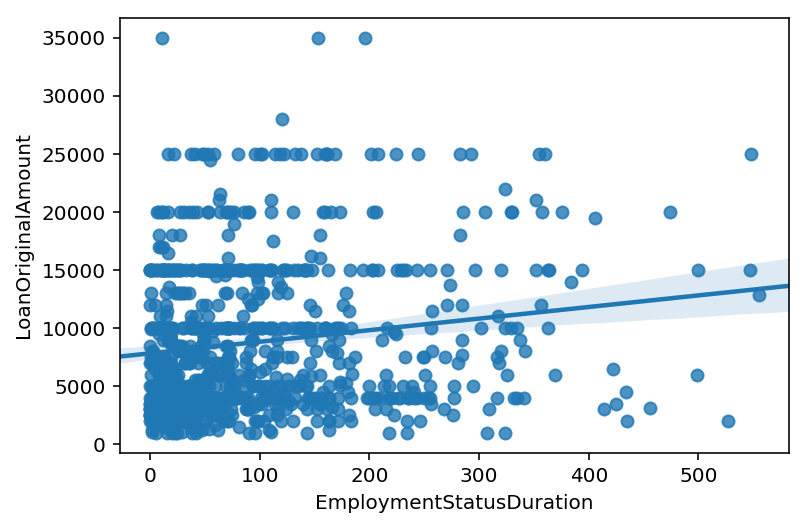

In [102]:
# Sample 500 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0], 1000, replace = False)
loans_samp = ld_u.loc[samples,:]

sb.regplot(data = loans_samp, x = 'EmploymentStatusDuration', y = 'LoanOriginalAmount');

Not much correlation b/w variables, but again we see data point fall in stairghl line according to the distinct LA values (10K, 15K, etc...) This may mean that the loans are sold and packaged at these LAs.

Time to dive deeper into bivariate exploration between qualitative and quantitative variables.

It will be interesting to investigate how the parameters of:


`Numeric`: 

- LoanOriginalAmount = LA
- BorrowerAPR = APR

are afected by the categories of:

`Categorical`:

- EmploymentStatus = ES
- IncomeVerifiable = IV
- IncomeRange = IR


I will have to segment the dataset according the LS and see if there is any correlation with respect to variables.

How:

`Numeric`: 

- LoanOriginalAmount = LA
- BorrowerAPR = APR
- EmploymentStatusDuration = EMP
- DebtToIncomeRatio = DI

differ according to the LS (Loan Status):

`Categorical`:

- LoanStatus = LS

----------------------------------------------------------------------


`Categorical`:

- EmploymentStatus = ES
- IncomeVerifiable = IV
- LoanStatus = LS
- IncomeRange = IR


`Numeric`: 

- LoanOriginalAmount = LA
- BorrowerAPR = APR
- EmploymentStatusDuration = EMP
- MonthlyLoanPayment = MP
- DebtToIncomeRatio = DI


In [103]:
# Checking for categories
ld_u.EmploymentStatus.value_counts()

Employed         65896
Full-time        25590
Not available     5251
Other             3526
Self-employed     1092
Part-time          969
Retired            735
Not employed        96
Name: EmploymentStatus, dtype: int64

In [104]:
# Setting up 'EmploymentStatus' categorical variables 
empstatus_vars = ['Employed', 'Full-time', 'Not available', 
                  'Other', 'Self-employed', 'Part-time', 
                  'Retired', 'Not employed']
estatuses = pd.api.types.CategoricalDtype(ordered = True, 
                                        categories = empstatus_vars)
ld_u['EmploymentStatus'] = ld_u['EmploymentStatus'].astype(estatuses);

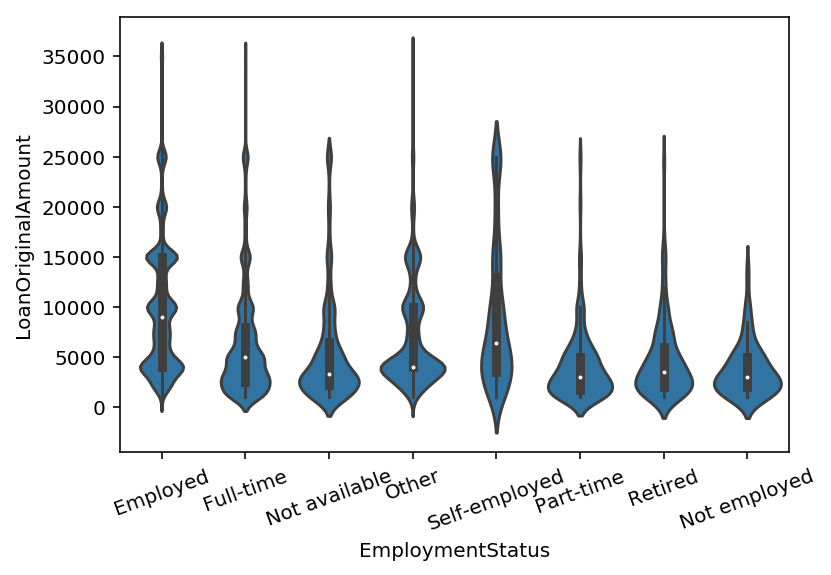

In [105]:
base_color = sb.color_palette()[0]
sb.violinplot(data = ld_u, x = 'EmploymentStatus', 
              y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 20);


In it is evedent from the plot that status "Employed" get more of larger LAs compared to the other statuses. 

Status "Other" displays more 10K and 15K LAs.  The long tail suggest that there're outliers all the way to 35K LA. Very interesting to know, what is meant by "Other"?  What additional documents the bank is asking to qualify borrowers with this status for a loan.

Status "Full-time" is in the third place with fewer LAs at 10K and 15K LAs, compare to "Other", but has more loans issued with 25K LA.  It is not clear what statuses "Employed", "Full-time" and "Other" really mean to the bank.  Why he issues 10K and 15K LAs to "Other" than "Full-time", but more 25K LAs to "Employed" than "Other"

However it is evident that the group with less or no employment verification yeilds smaller LAs.  "Not-available", "Part-time", "Retired" and "Not employed" have most LAs at 2.5K level, with tails that stop at 15K and 25K LAs.  This is considerable lower than the: "Employed", "Full-time" and "Other" group with tails reaching 35K LAs



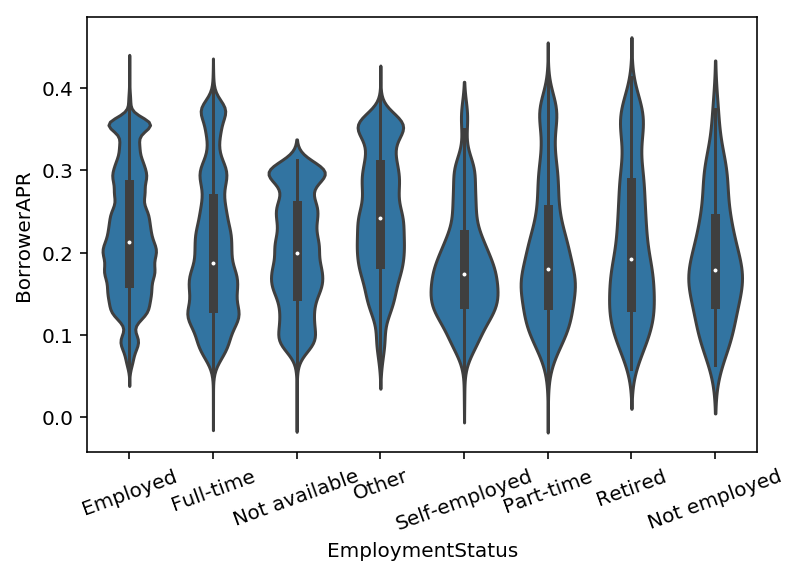

In [106]:
base_color = sb.color_palette()[0]
sb.violinplot(data = ld_u, x = 'EmploymentStatus', 
              y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 20);


For the majority of the loans for low income cats. ("Part-time", "Retired" and "Not employed") except "Not-available", the APR is lower.  

For the majority of the loans for high income cats. ("Employed", "Full-time", "Other") the APR is higher - more loans are issued with higher APR than the low income cats. 

Howerve the tails - outliers are longer in low-income cats., meaning that few of the loans in low-income cats have the highest APRs in the whole dataset.

"Not available" has a significant amount of loans with a high APR = 0.3%, but no outliers, signalling that its a risk group. Similar situation with "Other" with many loans at APR = 0.35% and a very short bottom tail, meaning no low APRs for this category - risk group.

In [111]:
ld_u.IncomeRange.value_counts()

$25K-49.9K    29880
$100K+        16071
$75K-99.9K    16015
ND             7588
$1-24.9K       6361
NE               78
$50K-74K          0
Name: IncomeRange, dtype: int64

##### We can conclude that Employment Status of a borrower affects the Loan Amount and the APR that is given by the bank

In [107]:
# Setting up the categoric variables
cat_vars = ['IncomeVerifiable', 'IncomeRange']


In [108]:
# Renaming the categories for visualisation
ld_u['IncomeRange'] = ld_u['IncomeRange'].replace('$1-24,999', '$1-24.9K')
ld_u['IncomeRange'] = ld_u['IncomeRange'].replace('Not displayed', 'ND')
ld_u['IncomeRange'] = ld_u['IncomeRange'].replace('$75,000-99,999', '$75K-99.9K')
ld_u['IncomeRange'] = ld_u['IncomeRange'].replace('$100,000+', '$100K+')
ld_u['IncomeRange'] = ld_u['IncomeRange'].replace('$50,000-74,999', '$50K-74.9K')
ld_u['IncomeRange'] = ld_u['IncomeRange'].replace('$25,000-49,999', '$25K-49.9K')
ld_u['IncomeRange'] = ld_u['IncomeRange'].replace('Not employed', 'NE')

In [109]:
# Setting up 'EmploymentStatus' categorical variables 
incrange_vars = ['NE', 'ND', '$1-24.9K', '$25K-49.9K', 
                  '$50K-74K', '$75K-99.9K', '$100K+']
incranges = pd.api.types.CategoricalDtype(ordered = True, 
                                        categories = incrange_vars)
ld_u['IncomeRange'] = ld_u['IncomeRange'].astype(incranges);



In [110]:
ld_u.IncomeRange.value_counts()

$25K-49.9K    29880
$100K+        16071
$75K-99.9K    16015
ND             7588
$1-24.9K       6361
NE               78
$50K-74K          0
Name: IncomeRange, dtype: int64

/Users/senkampro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 576x576 with 0 Axes>

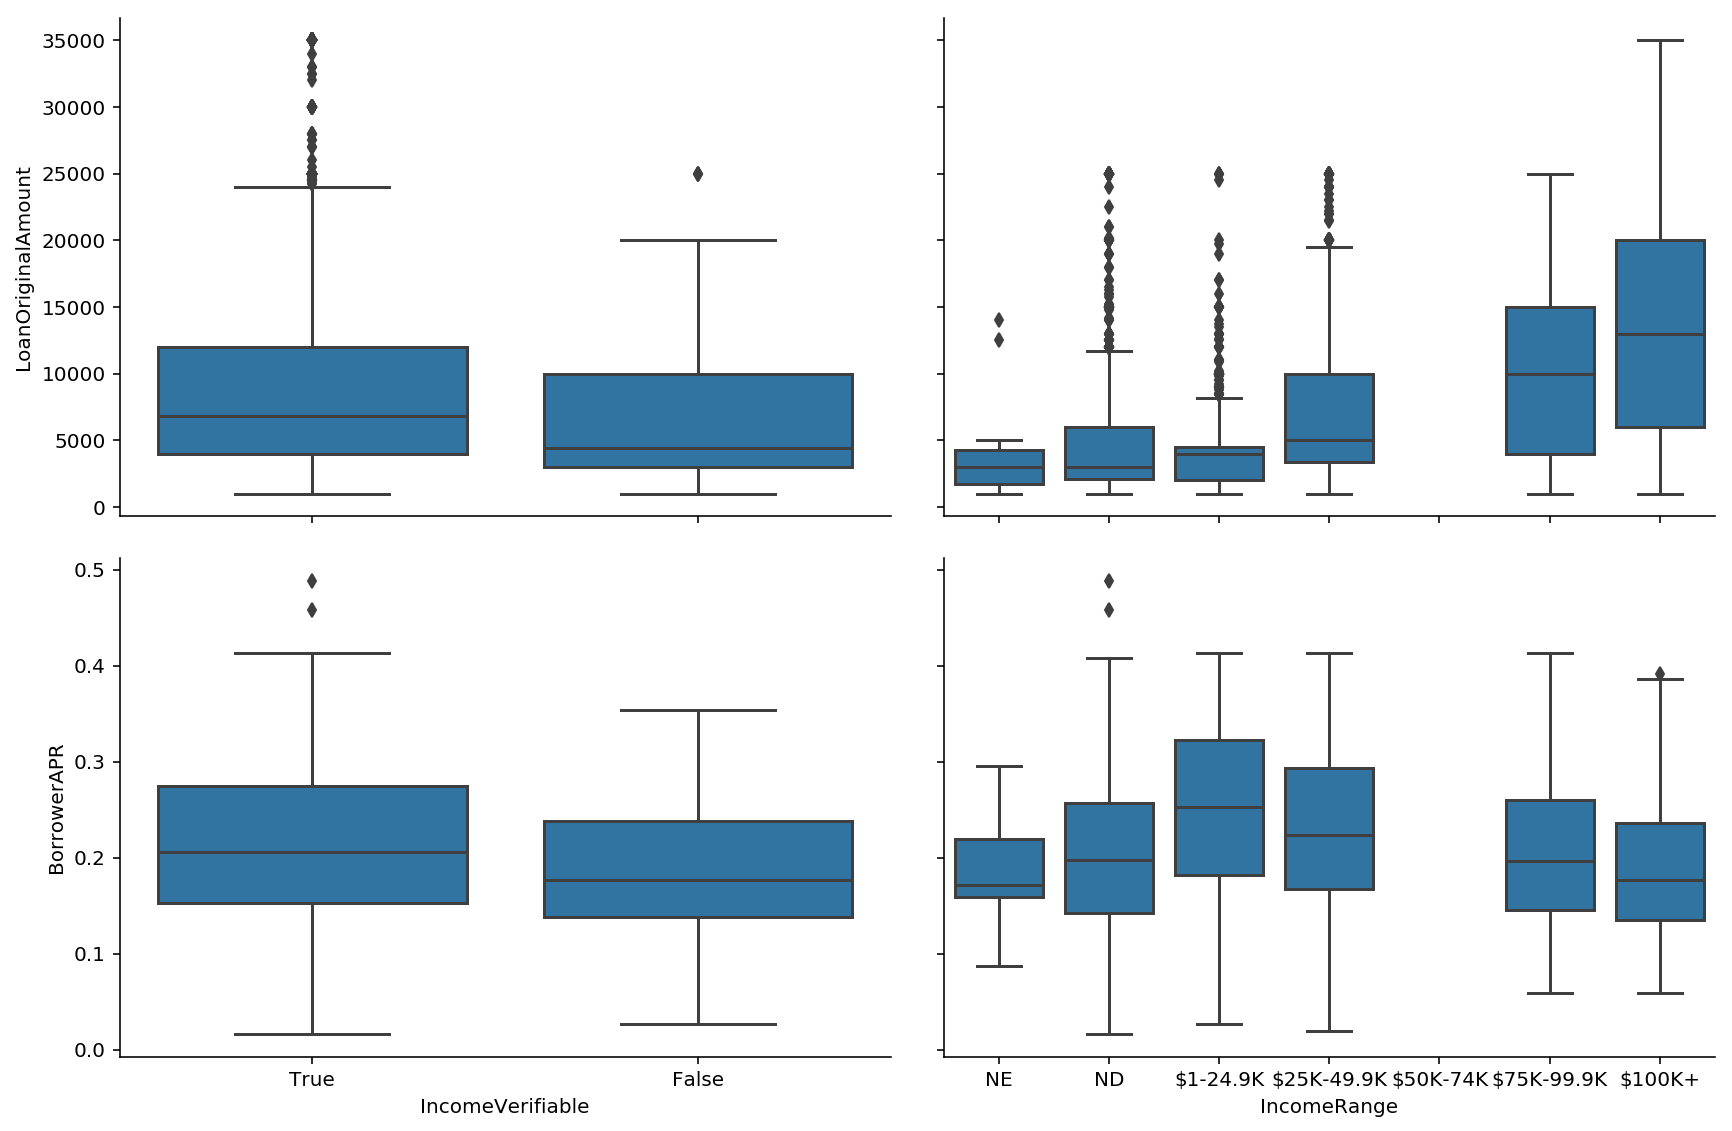

In [105]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(ld_u.shape[0], 20000, replace = False)
ldu_samp = ld_u.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [8, 8])
g = sb.PairGrid(data = ldu_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = cat_vars,
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [108]:
ld.IncomeRange.value_counts()

$25,000-49,999    32191
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7712
$1-24,999          7274
Not employed       1427
Name: IncomeRange, dtype: int64

In [107]:
ld_u.IncomeRange.value_counts()

$25K-49.9K    29880
$100K+        16071
$75K-99.9K    16015
ND             7588
$1-24.9K       6361
NE               78
$50K-74K          0
Name: IncomeRange, dtype: int64

IV and LA - from the plot it is obvious that verifiable provides for bigger LA, especially if we consider  the level of outliers.  The plot shows that without income verification the LA is smaller and limited to 15K most.

IV and APR - the plot shows that with verifiable income the APR range is larger. This is very interesting, because higher risk (no verifiable income) yields higher APR.  But high APR on the risky group may raise the risk.  

IR and LA - 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!